#Weak Lensing Maps Demo

##### Spencer Everett, SLAC 2015

First import the necessary files.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
#from pangloss import *
import numpy as np
import scipy as sp
import astropy.io.fits as pyfits
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
## Need this for dumb reason, fix later
import sys
sys.path.append('/home/spencer/Documents/Pangloss/')
from pangloss import *

Create a new Kappamap object K for the test file 'GGL_los_8_0_0_N_4096_ang_4_rays_to_plane_37_f.kappa' located in the '/data' directory of the WL-branch. Note that as it is not a fits file, the optional parameter is set to false.

In [4]:
K = Kappamap('data/GGL_los_8_0_0_N_4096_ang_4_rays_to_plane_37_f.kappa',FITS=False)

Kappamap is now a subclass of WLMap (weak-lensing map), which contains most of the methods used in the previous version of Kapamap. As the file is not a fits file, the following parameters are automatically set:

Field Size (self.field): 4 deg x 4 deg  

Number of Pixels (self.NX*self.NX): 4096 x 4096

Pixel-scale (self.PIXSCALE): 4 deg / 4096 = 0.000977 deg/pix

Output (self.output): 'data/GGL_los_8_0_0_N_4096_ang_4_rays_to_plane_37_f.kappa.fits'

As part of the constructor, the .kappa file is also converted and saved as a .fits file in the same directory.
Convergence values in the kappa-map are obtained using the at() method:

In [5]:
K.at(0,0), K.at(.002,-.001), K.at(np.deg2rad(1), np.deg2rad(-1))

(-0.0079472986399196088, 0.0040183682880805781, 0.023042059736326337)

Attempting to retrieve convergence values outside of the map always results in a return of 0.

In [6]:
K.at(0,np.pi)

0.0

A Kappamap object can also plot itself using the plot() method.

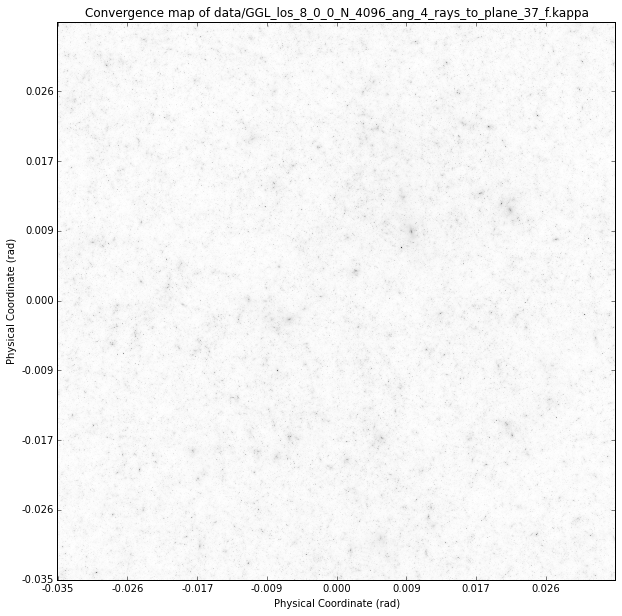

In [7]:
K.plot()

The size of the plot can be changed using the first optional argument 'fig_size', where the value is in inches. The default size is 10 in.

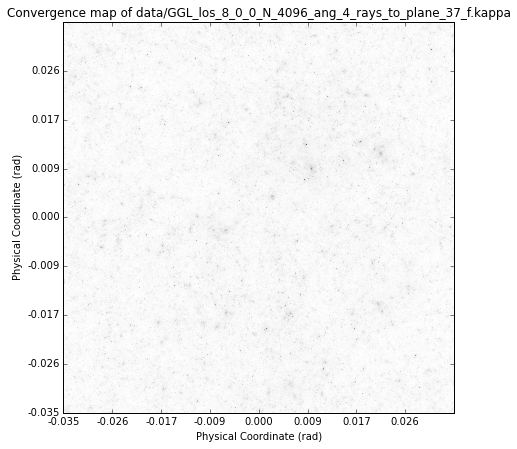

In [8]:
K.plot(7)

The plot method can also be used to graph a subplot. Simply add a list parameter of the form:

suplot = [< x-initial >, < x-final >, < y-initial >, < y-final >]

where each value in <...> is the desired pixel number.

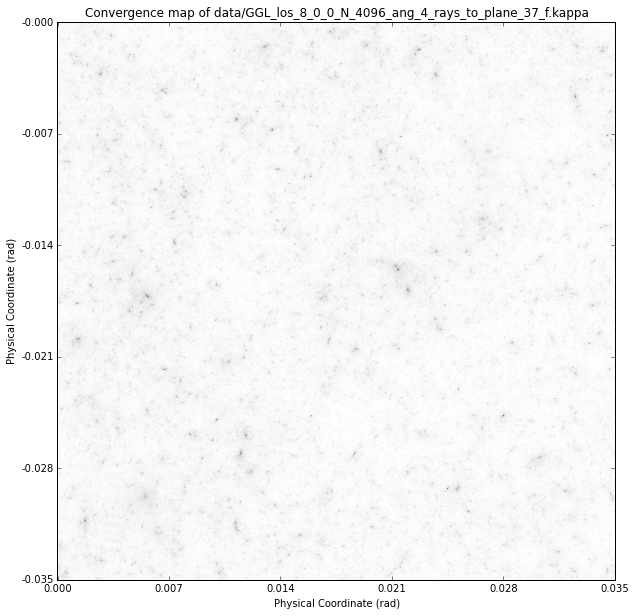

In [9]:
K.plot(10,[2049,4096,0,2048])

For a much more zoomed in picture:

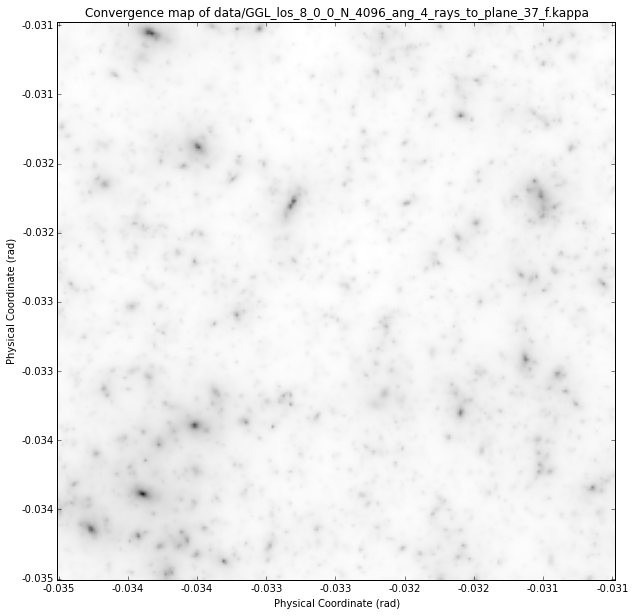

In [10]:
K.plot(10,[0,250,0,250])

Alternatively, the subplot bounds can be passed with physical coordinates using the final optional argument 'coords'. By default, coords is set to 'pixel' rather than 'physical'.

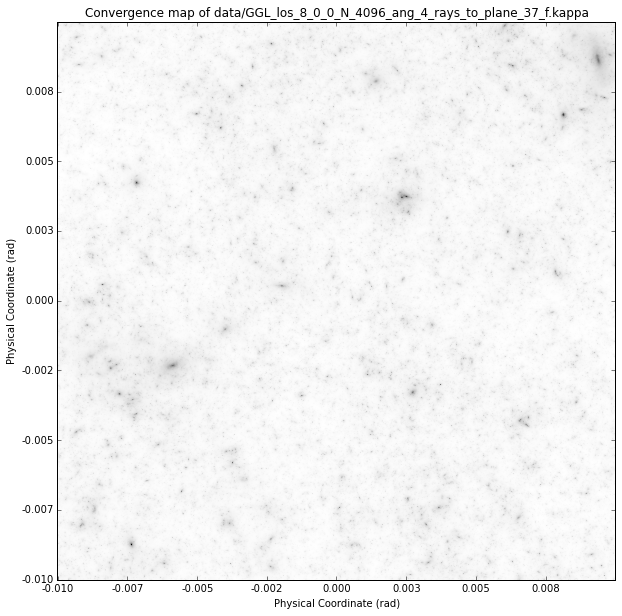

In [11]:
K.plot(10,[-.01,.01,-.01,.01],'physical')

Finally, while the original map itself is square (4096 x 4096 pixels) the subimage does not need to be square.

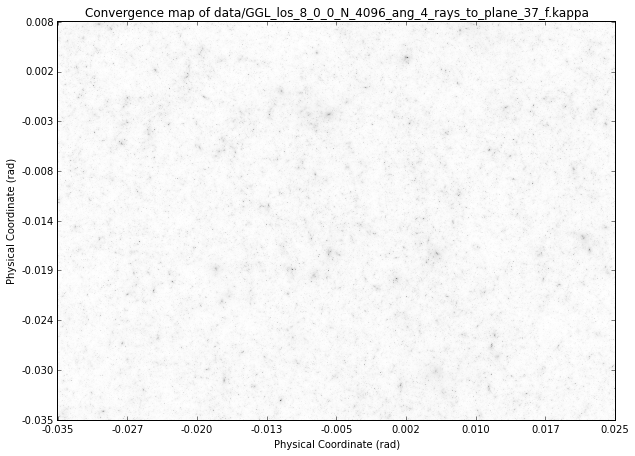

In [12]:
K.plot(10,[0,3500,0,2500])

We can also create a Shearmap object. Like Kappamap, the Shearmap class is a subclass of WLMap but requires two file inputs; one file for each component of the complex shear. The files $\textit{must}$ be passed in a list (unlike a Kappamap file, it is automatically converted) and must be in order (first the .gamma1 file, then the .gamma2 file). As before, the optional second argument is set to 'FITS = false' as the file has yet to be converted to .fits.

In [13]:
S = Shearmap(['data/GGL_los_8_0_0_N_4096_ang_4_rays_to_plane_37_f.gamma_1','data/GGL_los_8_0_0_N_4096_ang_4_rays_to_plane_37_f.gamma_2'],FITS=False)

A Shearmap object is currently two separate maps: gamma1 and gamma2. Each map attribute is now stored as a list, with the first and second entry corresponding to gamma1 and gamma2 (Maybe change this, do we really need two versions of the same data?). For example, 

In [14]:
S.values[0] # The shearmap values for the gamma1 map

array([[  5.60115930e-03,   6.39436534e-03,   6.40015723e-03, ...,
         -2.20925122e-05,  -8.27380689e-04,   1.34383084e-03],
       [ -1.57251168e-04,   1.87345629e-03,   2.25435290e-03, ...,
         -3.09474417e-03,  -4.20970842e-03,  -9.02319269e-04],
       [ -3.86622665e-03,  -1.28266669e-03,   2.61628738e-04, ...,
         -5.16812131e-03,  -7.13164080e-03,  -2.03410280e-03],
       ..., 
       [  3.13768983e-02,   3.53595652e-02,   3.44255455e-02, ...,
         -5.15447231e-03,   1.02778722e-03,  -1.44818809e-03],
       [  3.02359760e-02,   3.53406854e-02,   3.70858125e-02, ...,
         -8.09114368e-04,   2.33800570e-03,  -1.16832973e-03],
       [  2.70190202e-02,   2.80189943e-02,   1.89315286e-02, ...,
         -3.63504468e-03,   1.03648286e-03,   2.06721551e-03]], dtype=float32)

In [15]:
S.values[1] # The shearmap values for the gamma2 map

array([[-0.04114537, -0.03823771, -0.03450574, ..., -0.00924038,
        -0.00435786,  0.00041931],
       [-0.04342448, -0.03918865, -0.03567995, ..., -0.01350109,
        -0.00570752,  0.00086826],
       [-0.04252999, -0.03922154, -0.03604227, ..., -0.01565584,
        -0.00725669,  0.00176763],
       ..., 
       [ 0.00355339, -0.00443153, -0.02298716, ..., -0.00507053,
        -0.00907261, -0.01196655],
       [ 0.01031568,  0.01171172,  0.01396914, ..., -0.01014063,
        -0.01085359, -0.01317145],
       [ 0.01468208,  0.0207901 ,  0.03035841, ..., -0.01330485,
        -0.01293556, -0.01289561]], dtype=float32)

If the files have .gamma1 and .gamma2 extensions, the attributes are set automatically in WLMap. A few of the important attributes set for the maps are:

Field Size (self.field): 4 deg x 4 deg  

Number of Pixels (self.NX*self.NX): 4096 x 4096

Pixel-scale (self.PIXSCALE): 4 deg / 4096 = 0.000977 deg/pix

Output (self.output): ['data/GGL_los_8_0_0_N_4096_ang_4_rays_to_plane_37_f.gamma1.fits',
'data/GGL_los_8_0_0_N_4096_ang_4_rays_to_plane_37_f.gamma1.fits']

The at() method works similarly for a Shearmap, but a third argument now specifies which map (gamma1 or gamma2) the method will extract from.

In [16]:
S.at(0,0,0) # gamma1 value at )0,0)

-0.05564130749553442

In [17]:
S.at(0,0,1) # gamma2 value at (0,0)

-0.0033700582571327686

Note that if no third argument is passed, the method defaults to the first map (i.e. 0).

In [18]:
S.at(0,0)

-0.05564130749553442

The plot() method for a Shearmap is quite different (Explain details and small derivation of complex gamma, etc).

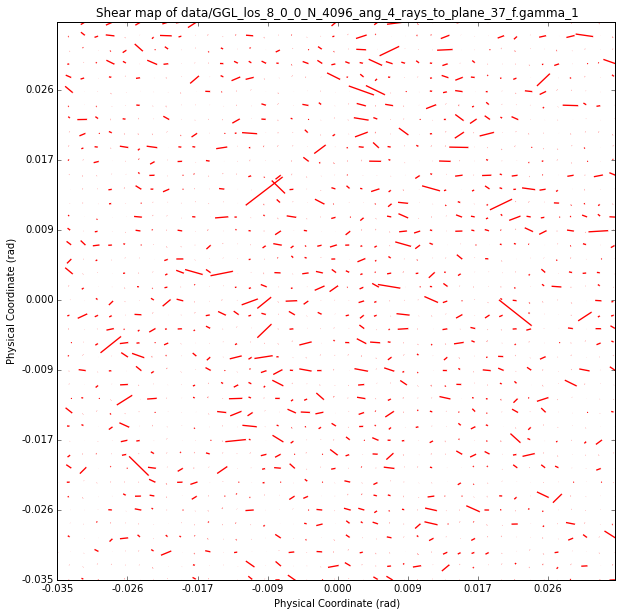

In [19]:
S.plot()

Resizing the image is the same as with Kappamap, simply pass one argument with the desired figure size in inches.

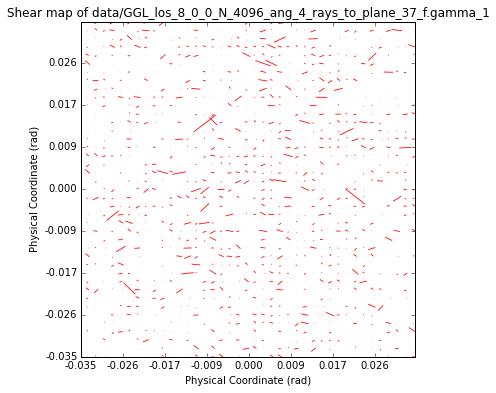

In [20]:
S.plot(6)

Subplots also work with Shearmaps. As with Kappamaps, simply add a list parameter of the form:

suplot = [< x-initial >, < x-final >, < y-initial >, < y-final >]

where each value in <...> is the desired pixel number. Note that the shear stick sampling for the subplot is adjusted so that the shear stick density remains the same regardless of size (40 sticks per axis).

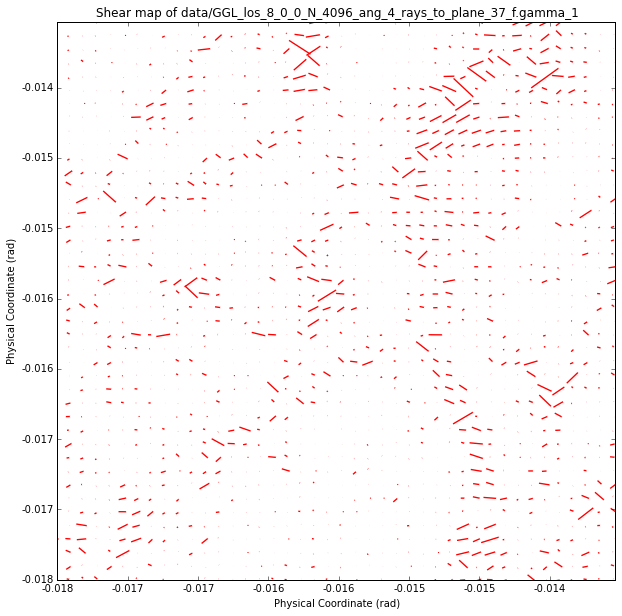

In [21]:
S.plot(10,[1000,1250,1000,1250])

Physical coordinates can also be inputted instead of pixel numbers by adding the optional argument 'physical'. This parameter is set to 'pixel' by default.

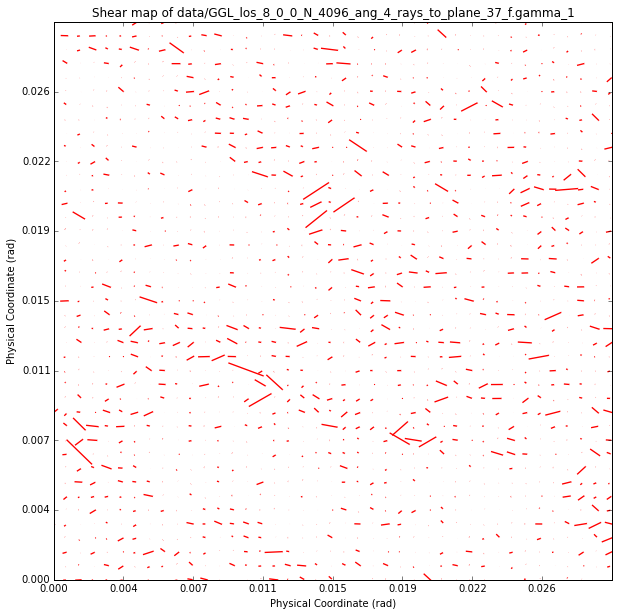

In [22]:
S.plot(10,[0,.03,0,.03],'physical')

When the subplot is not square, the sampling of shear sticks is held constant rather than the number of sticks so that the image is not distorted.

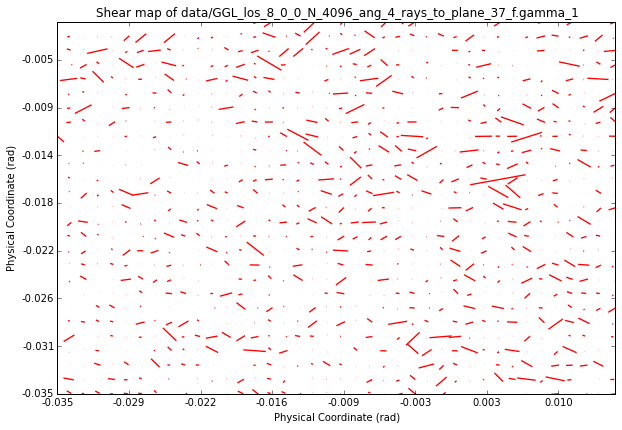

In [23]:
S.plot(10,[0,3000,0,2000])

However, the size of the sticks still seems dependent on the size of the x-axis. This makes subplots with a larger y-axis harder to view as seen below. Need to look further into numpy.quiver() to determine how to resolve this.

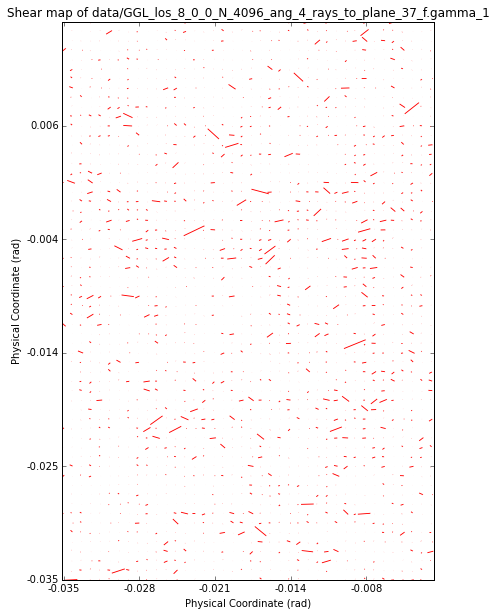

In [24]:
S.plot(10,[0,2000,0,3000])

A plotting method to combine Kappamaps and Shearmaps is on its way!

Make sure the following plots are correct!!

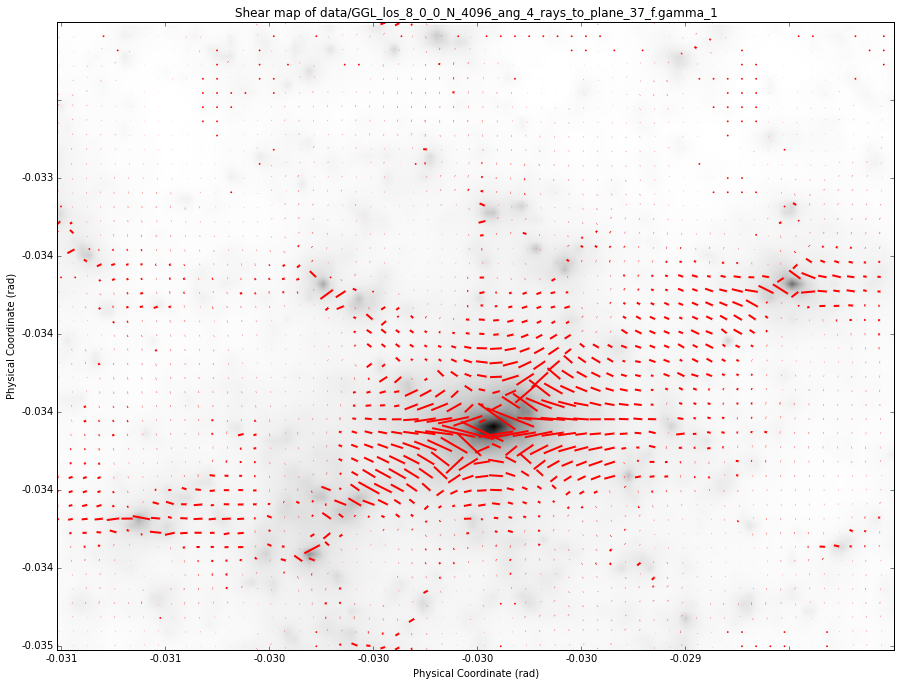

In [25]:
K.plot(15,[-.031,-.029,-.0345,-.033],'physical')
S.plot(15,[-.031,-.029,-.0345,-.033],'physical')

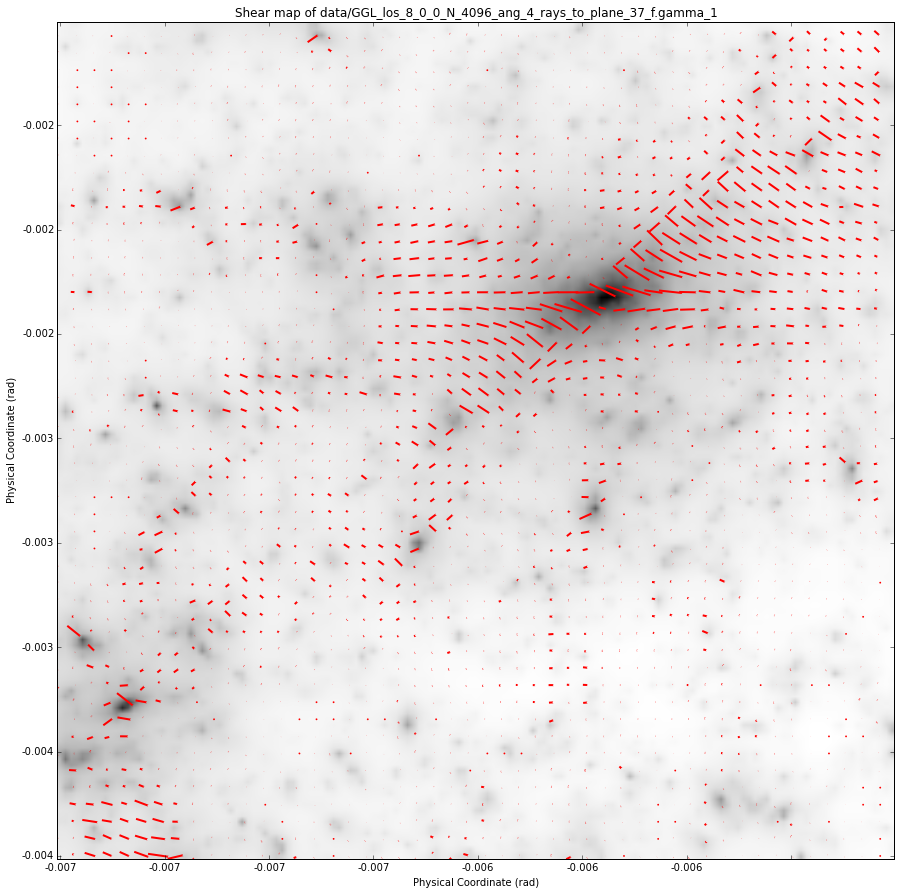

In [26]:
K.plot(15,[-.0075,-.005,-.004,-.0015],'physical')
S.plot(15,[-.0075,-.005,-.004,-.0015],'physical')